In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
california = fetch_california_housing()

data = pd.DataFrame(california.data, columns=california.feature_names)

data['MEDV'] = california.target

In [3]:
x = data[['MedInc']].values
y = data[['MEDV']].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
degree = 3
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [6]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(x_test_poly)

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6982964744960334


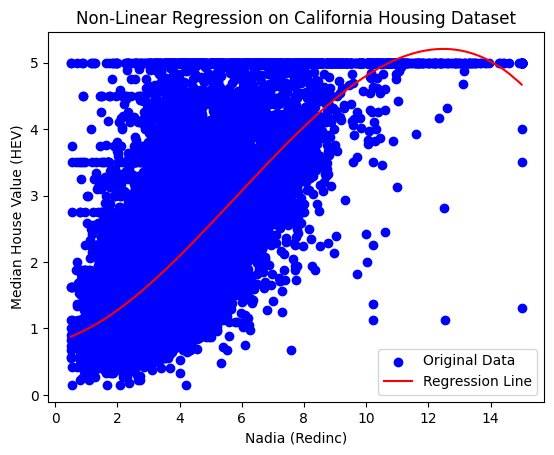

In [12]:
plt.scatter(x, y, color='blue', label='Original Data')

# Sort x_train for smooth plotting
sorted_indices = np.argsort(x_train.flatten())
x_sorted = x_train.flatten()[sorted_indices]
y_pred_sorted = model.predict(x_train_poly)[sorted_indices]

# Plot the regression line
plt.plot(x_sorted, y_pred_sorted, color='red', label='Regression Line')

# Axis labels and title
plt.xlabel("Nadia (Redinc)")  # Double-check if this is your intended label
plt.ylabel("Median House Value (HEV)")  # Fixed quotes and typo
plt.title("Non-Linear Regression on California Housing Dataset")  # Cleaned up punctuation

# Show legend
plt.legend()
plt.show()